<img src="imagens/Boas vindas.png">

# Sumário - Regressão

1) **R²**

2) **MSE/RMSE**

3) **MAE**

4) **Exemplo Comparativo**

# 1. R²

### O R² (pronuncia-se "R ao quadrado") é uma métrica comumente usada para avaliar a qualidade de um modelo de regressão em Machine Learning.

- Em outras palavras, o R² mede a proporção da variabilidade dos dados que é explicada pelo modelo.

### O valor do R² varia de 0 a 1,

- O R² de 1 indica que o modelo explica perfeitamente toda a variabilidade dos dados. 
- O R² de 0 indica que o modelo não explica nenhuma variação dos dados. 
- Valores intermediários de R² indicam que o modelo explica uma parte da variabilidade dos dados.

o R² tem algumas limitações e **não deve ser usado como a única métrica para avaliar um modelo.** 

Por exemplo, o R² não considera a capacidade do modelo de fazer previsões precisas para valores não vistos nos dados de treinamento (overfitting ou underfitting), nem a distribuição dos erros de previsão.

O valor de R² é dado por:

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{equation}

Onde,

- $\sum_{i=1}^n (y_i - \hat{y}_i)^2$ é a soma dos quadrados dos resíduos (erros de previsão)


- $\sum_{i=1}^n (y_i - \bar{y})^2$ é a soma dos quadrados totais, definida como a soma dos quadrados entre a média e os valores observados.

Vamos gerar um conjunto de dados sintético de regressão linear. Para isso, vamos utilizar a biblioteca `numpy` e a função `randn` para gerar números aleatórios de uma distribuição normal:

In [1]:
import numpy as np

# gerando dados sintéticos de regressão linear
np.random.seed(80)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

Estamos gerando 100 valores aleatórios para a variável `x` e 100 valores correspondentes para a variável `y`. A relação entre `x` e `y` é linear, com um coeficiente de inclinação de 2 e um termo de erro aleatório adicionado.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 20,
          'figure.figsize': (15,5),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize': 20,
         'ytick.labelsize': 20}

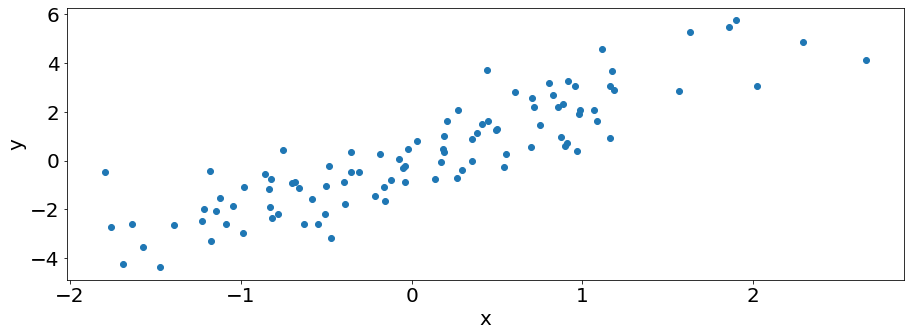

In [4]:
# plotando os dados
pylab.rcParams.update(params)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Vamos ajustar um modelo de regressão linear aos dados e calcular o R²

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=80)

# ajustando um modelo de regressão linear aos dados de treinamento
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)

# fazendo previsões com o modelo nos dados de teste
y_pred = model.predict(x_test.reshape(-1, 1))

# calculando o R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

R²: 0.86


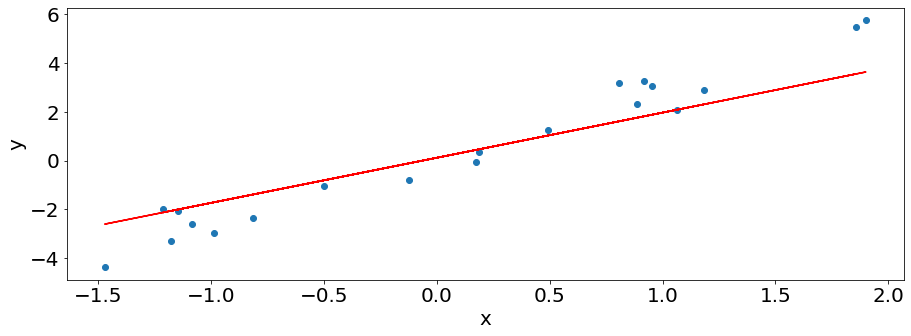

In [6]:
# plotando os dados e a linha de regressão linear
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2. MSE/RMSE (*Mean Squared Error/Root Mean Squared Error*)

### O Erro Médio Quadrático (MSE) e a Raiz do Erro Médio Quadrático (RMSE) são métricas comuns usadas para avaliar a qualidade dos modelos de machine learning.

**O MSE é calculado encontrando a média dos quadrados das diferenças entre os valores reais e previstos de um conjunto de dados. Quanto menor o valor do MSE, melhor é o desempenho do modelo.**

**O RMSE é simplesmente a raiz quadrada do MSE. Ele é usado para medir o erro médio entre as previsões do modelo e os valores reais em uma escala mais intuitiva. Assim como o MSE, quanto menor o valor do RMSE, melhor é o desempenho do modelo.**

Essas métricas são especialmente úteis quando se trabalha com problemas de regressão, onde o objetivo é prever um valor numérico, como por exemplo, prever o preço de uma casa.

**O MSE/RMSE medem a precisão do modelo na previsão desses valores numéricos.**

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
\end{equation}

\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
\end{equation}

Onde:
    
- $y_i$ é o valor verdadeiro da i-ésima amostra;
- $\hat{y_i}$ é o valor previsto para a i-ésima amostra;
- $n$ é o número total de amostras

Vamos criar um exemplo simples de uso do MSE e do RMSE em Python, utilizando um conjunto de dados de preços de casas em função de suas áreas. Portanto, podemos gerar aleatoriamente um conjunto de dados de áreas e preços de casas:

In [7]:
np.random.seed(42)  # para garantir que os resultados sejam replicáveis

X = np.random.randint(low = 50, high = 300, size = 100)  # áreas entre 50 e 300 metros quadrados
y = 5000 + 500 * X + np.random.normal(scale = 8000, size = 100)  # preços com base na área, com ruído adicionado

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size = 0.2, 
                                                    random_state = 42)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Podemos calcular o MSE e o RMSE para avaliar o desempenho do modelo:

In [10]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"MSE no conjunto de treino: {mse_train:.2f}")
print(f"MSE no conjunto de teste: {mse_test:.2f}")
print(f"RMSE no conjunto de treino: {rmse_train:.2f}")
print(f"RMSE no conjunto de teste: {rmse_test:.2f}")

MSE no conjunto de treino: 62486319.13
MSE no conjunto de teste: 59519383.11
RMSE no conjunto de treino: 7904.83
RMSE no conjunto de teste: 7714.88


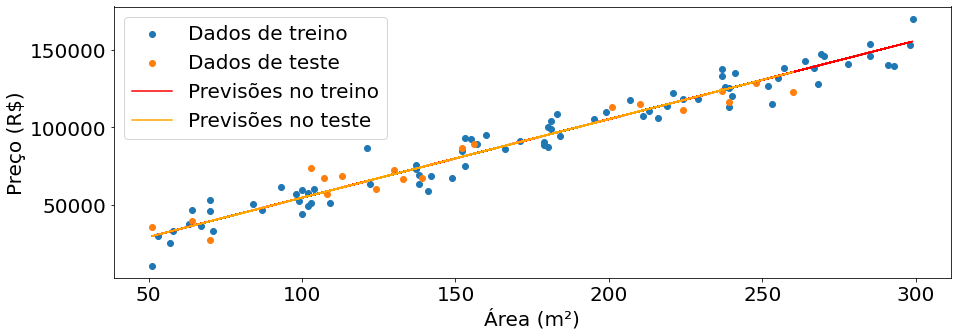

In [11]:
plt.scatter(X_train, y_train, label = "Dados de treino")
plt.scatter(X_test, y_test, label = "Dados de teste")
plt.plot(X_train, y_pred_train, c = "red", label = "Previsões no treino")
plt.plot(X_test, y_pred_test, c = "orange", label = "Previsões no teste")
plt.xlabel("Área (m²)")
plt.ylabel("Preço (R$)")
plt.legend()
plt.show()

# 3. MAE (*Mean Absolute Error*) 

### O MAE é uma medida de erro que calcula a diferença média absoluta entre as previsões do modelo e os valores reais. 

Em outras palavras, ele calcula a média das diferenças absolutas entre cada previsão e o valor real correspondente.

O cálculo do MAE é relativamente simples. Seja $y$ o vetor contendo os valores reais e $\hat{y}$ o vetor contendo as previsões do modelo, então o MAE é dado por:

\begin{equation}
\text{MAE} = \frac{1}{n} * \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

onde $n$ é o número de exemplos no conjunto de dados.

O MAE é útil porque fornece uma medida de quão longe as previsões do modelo estão dos valores reais, em termos absolutos. 

Ele pode ser usado para comparar diferentes modelos e determinar qual deles tem um desempenho melhor.

In [12]:
from sklearn.metrics import mean_absolute_error

# Criar um conjunto de dados sintético
np.random.seed(8)
X = np.random.rand(100, 1)
y = 2 * X + 1*np.random.randn(100, 1)  # Adicionar ruído gaussiano

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = X[:70], X[70:], y[:70], y[70:]

In [14]:
# Treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", round(mae,2))

MAE:  0.85


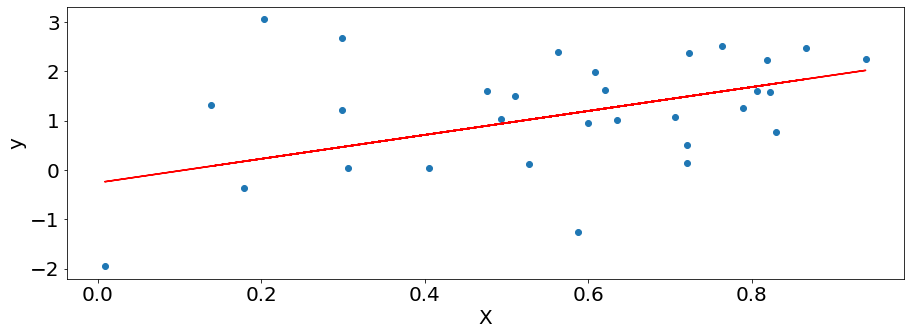

In [15]:
# Plotar as previsões vs valores reais
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 4. Exemplo Comparativo - Classificação por Regressão

## Parte 1: Carregando o conjunto de dados
Para este exemplo, vamos utilizar o conjunto de dados "Wine Quality", que pode ser baixado diretamente do repositório da UCI Machine Learning. O conjunto de dados possui informações sobre características físico-químicas de diferentes tipos de vinho, bem como sua qualidade. O objetivo é criar um modelo capaz de prever a qualidade do vinho com base em suas características.

Vamos começar importando as bibliotecas necessárias e carregando o conjunto de dados:

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregando o conjunto de dados
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=';')

In [17]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Parte 2: Preparando os dados
O conjunto de dados precisa ser preparado antes de ser utilizado para treinar e testar os modelos de machine learning. Vamos começar separando a variável alvo ("quality") das outras variáveis explicativas:

In [18]:
# Separando a variável alvo das variáveis explicativas
X = data.drop(['quality'], axis = 1)
y = data['quality']

# Dividindo o conjunto de dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Parte 3: Treinando e avaliando os modelos
Agora vamos criar três modelos de machine learning diferentes: regressão linear, árvore de decisão e floresta aleatória. Vamos treinar cada modelo com os dados de treino e avaliá-los com base nas métricas MAE, R², RMSE e MSE.

In [19]:
# Criando os modelos
linear = LinearRegression()
tree = DecisionTreeRegressor(random_state=42)
forest = RandomForestRegressor(random_state=42)

# Treinando os modelos
linear.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

# Fazendo as previsões
y_pred_linear = linear.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)

In [20]:
# Continuação do código da parte 3

# Calculando as métricas de avaliação
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mae_forest = mean_absolute_error(y_test, y_pred_forest)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)

r2_linear = r2_score(y_test, y_pred_linear)
r2_tree = r2_score(y_test, y_pred_tree)
r2_forest = r2_score(y_test, y_pred_forest)

## Parte 4: Visualizando os resultados
Finalmente, vamos visualizar os resultados das métricas de avaliação para cada modelo. Para isso, podemos criar um gráfico de barras utilizando a biblioteca `matplotlib`:

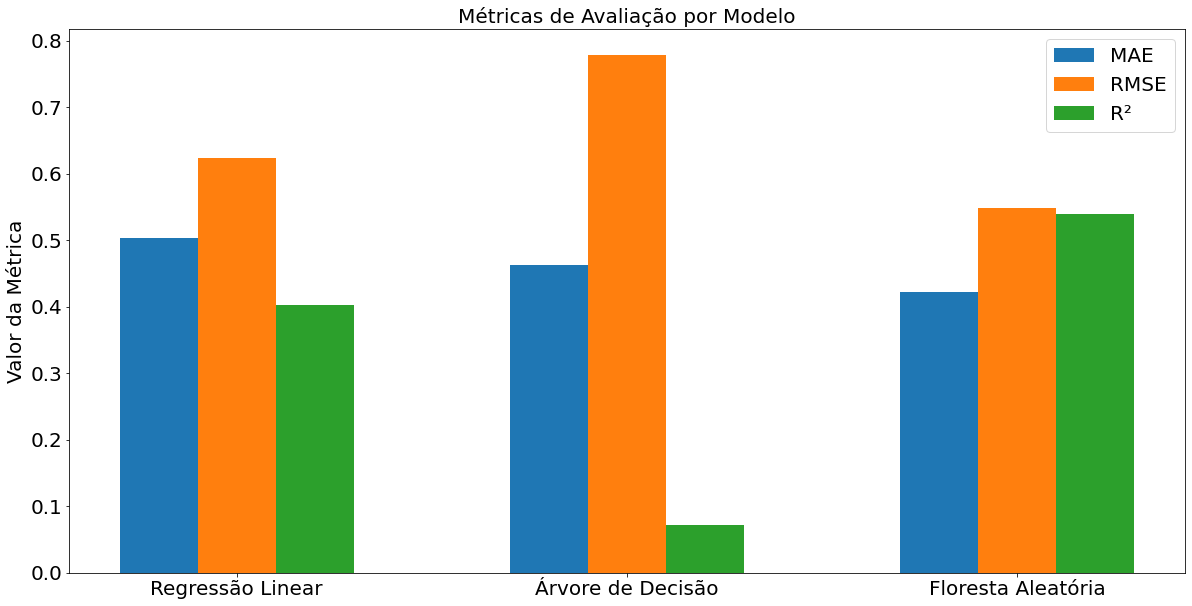

In [23]:
# Criando um gráfico de barras para comparar as métricas de avaliação
models = ['Regressão Linear', 'Árvore de Decisão', 'Floresta Aleatória']
mae = [mae_linear, mae_tree, mae_forest]
rmse = [rmse_linear, rmse_tree, rmse_forest]
mse = [mse_linear, mse_tree, mse_forest]
r2 = [r2_linear, r2_tree, r2_forest]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width, mae, width, label='MAE')
rects2 = ax.bar(x, rmse, width, label='RMSE')
rects3 = ax.bar(x + width, r2, width, label='R²')

ax.set_ylabel('Valor da Métrica')
ax.set_title('Métricas de Avaliação por Modelo')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

## Parte 5: Plotando as predições dos modelos

Podemos plotar também as predições dos modelos em relação aos valores reais, para ter uma visualização mais clara de como os modelos estão se saindo. Vamos fazer isso utilizando a biblioteca `seaborn`.

In [24]:
import seaborn as sns

# Função para plotar gráficos de predição e resíduos para cada modelo
def plot_predictions(model, y_pred):
    # Gráfico de predição
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.title(f'{model}')
    plt.xlabel('Valores Reais')
    plt.ylabel('Predições')
    plt.xlim([3, 9])
    plt.ylim([3, 9])
    plt.show()

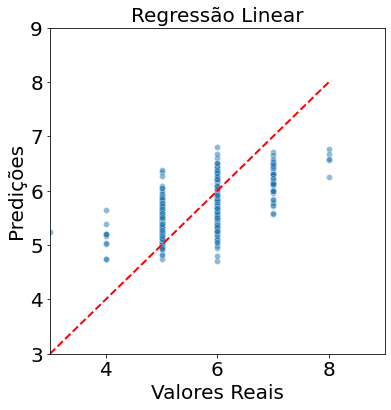

In [25]:
plot_predictions('Regressão Linear', y_pred_linear)

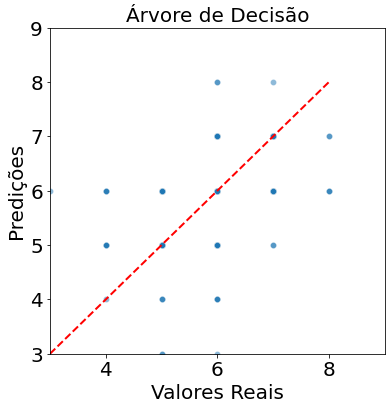

In [26]:
plot_predictions('Árvore de Decisão', y_pred_tree)

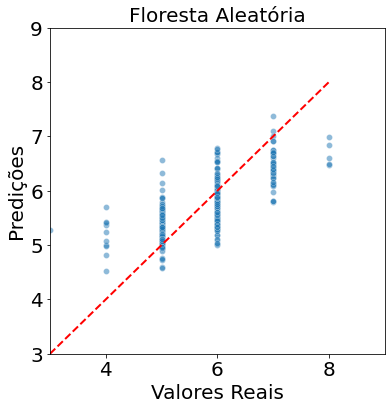

In [27]:
plot_predictions('Floresta Aleatória', y_pred_forest)

## É possível melhorar os resultados?

In [33]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [34]:
# carrega os dados do conjunto de dados wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.Series(data.target, name='target')

# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# padroniza os dados de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
svm = SVR(kernel='linear')
#svm = SVR(kernel='poly', degree=9)

lr = LinearRegression()

# treina os modelos de regressão
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

# faz previsões nos dados de teste
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

In [36]:
# calcula as métricas de avaliação
svm_r2 = r2_score(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(y_test, svm_pred)

lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)

In [37]:
# imprime os resultados
print("SVM:")
print(f"R² = {svm_r2:.2f}, MSE = {svm_mse:.2f}, RMSE = {svm_rmse:.2f}, MAE = {svm_mae:.2f}\n")

print("Regressão Linear:")
print(f"R² = {lr_r2:.2f}, MSE = {lr_mse:.2f}, RMSE = {lr_rmse:.2f}, MAE = {lr_mae:.2f}\n")

SVM:
R² = 0.88, MSE = 0.07, RMSE = 0.26, MAE = 0.21

Regressão Linear:
R² = 0.88, MSE = 0.07, RMSE = 0.26, MAE = 0.20



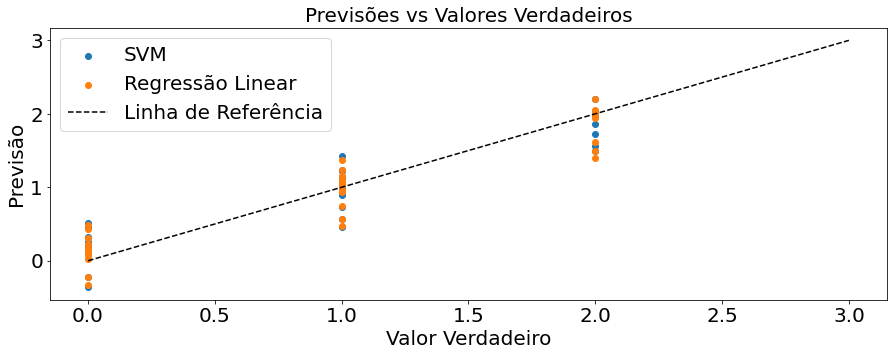

In [38]:
# plota as previsões vs os valores verdadeiros
plt.scatter(y_test, svm_pred, label='SVM')
plt.scatter(y_test, lr_pred, label='Regressão Linear')
plt.plot([0, 3], [0, 3], 'k--', label='Linha de Referência')
plt.legend()
plt.xlabel('Valor Verdadeiro')
plt.ylabel('Previsão')
plt.title('Previsões vs Valores Verdadeiros')
plt.show()